# Introduction

This dataset contains the sales record of mass products of two major supermarket brands in Colombia, including product names, subcategory, prices, among others. 
This notebook will be used to clean and explore the data to solve questions related to the revenue sales behavior of the different brands, subcategories and products. 

### Questions

* Q1: Sales and Income by subcategory.
* Q2: Sales and Income by Product.
* Q3: Sales and income per month in 2019.
* Q4: Top brands with the highest revenues and sales.

In [1]:
#Install openpyxl to read xlsx file
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive #Conecction to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("/content/drive/MyDrive/Data Analyst/Databases/Massive_Products.xlsx")
data.head(2)

,date,prod_id,prod_name,prod_name_long,prod_brand,category,subcategory,tags,prod_unit_price,prod_units,prod_icon,prod_source,source_type
0,20190609,7702155021451,Limpia tapicería en espuma Binner,Limpia tapicería en espuma Binner x 400ml,BINNER,Supermercado,Aseo de hogar,Alfombras,15590,Unidades,../icons/SVG/53-places/home-3.svg,VERDE,1
1,20190609,7702155016457,Limpia tapicería y alfombras Binner,Limpia tapicería y alfombras Binner x 500ml,BINNER,Supermercado,Aseo de hogar,Alfombras,13993,Unidades,../icons/SVG/53-places/home-3.svg,VERDE,1


# Transform dataframe

In [4]:
Columns_To_Drop = ["prod_icon", "source_type", "prod_id", "prod_name_long",
                   "tags"]

In [5]:
#Delete unnecesary columns
data_to_explore = data.drop(Columns_To_Drop, axis=1)

In [6]:
data_to_explore.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25638 entries, 0 to 25637
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             25638 non-null  int64 
 1   prod_name        25506 non-null  object
 2   prod_brand       25586 non-null  object
 3   category         25638 non-null  object
 4   subcategory      25638 non-null  object
 5   prod_unit_price  25633 non-null  object
 6   prod_units       25231 non-null  object
 7   prod_source      25638 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


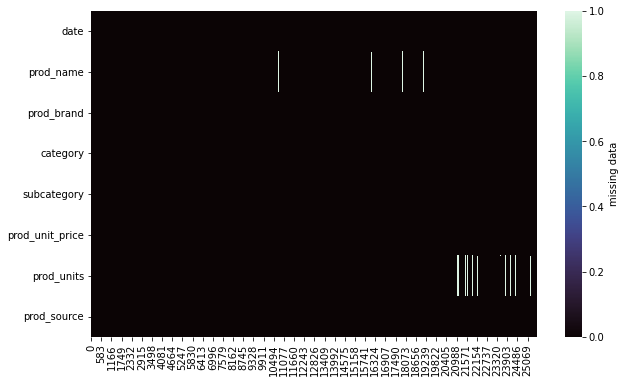

In [7]:
#Create heatmap with Seaborn to view nulls.
plt.figure(figsize=(10,6))
sns.heatmap(data_to_explore.isna().transpose(),
           cmap = "mako",
           cbar_kws = {"label":"missing data"} )
plt.savefig("productos-consumo-masivo_null-heatmap.png", dpi=100)

In [8]:
#Drop Nulls
data_to_explore.dropna(subset=["prod_name", "prod_units", "prod_brand", 
                               "subcategory", "prod_unit_price"], inplace=True)

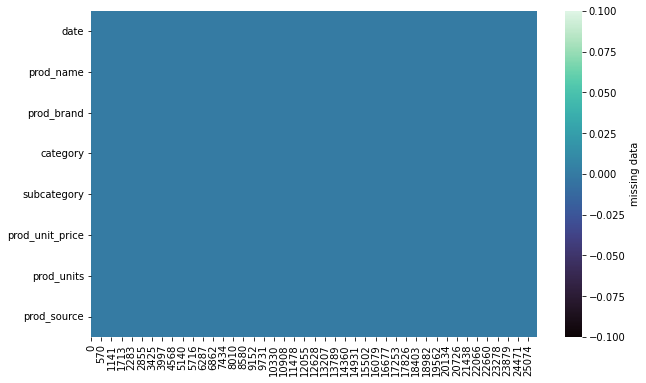

In [9]:
#Verify drop nulls
plt.figure(figsize=(10,6))
sns.heatmap(data_to_explore.isna().transpose(),
           cmap = "mako",
           cbar_kws = {"label":"missing data"} )
plt.savefig("productos-consumo-masivo_null-heatmap2.png", dpi=100)

In [10]:
#change type columns 
data_to_explore["date"] =  data_to_explore["date"].astype(str)
data_to_explore["prod_unit_price"] = pd.to_numeric(data_to_explore["prod_unit_price"],
                                                   errors = "coerce")
data_to_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25042 entries, 0 to 25637
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             25042 non-null  object 
 1   prod_name        25042 non-null  object 
 2   prod_brand       25042 non-null  object 
 3   category         25042 non-null  object 
 4   subcategory      25042 non-null  object 
 5   prod_unit_price  25038 non-null  float64
 6   prod_units       25042 non-null  object 
 7   prod_source      25042 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.2+ MB


In [11]:
data_to_explore["year"] = data_to_explore["date"].str[:4]
data_to_explore["month"] = data_to_explore["date"].str[4:6]
data_to_explore["day"] = data_to_explore["date"].str[6:]
data_to_explore.head(2)

,date,prod_name,prod_brand,category,subcategory,prod_unit_price,prod_units,prod_source,year,month,day
0,20190609,Limpia tapicería en espuma Binner,BINNER,Supermercado,Aseo de hogar,15590.0,Unidades,VERDE,2019,06,09
1,20190609,Limpia tapicería y alfombras Binner,BINNER,Supermercado,Aseo de hogar,13993.0,Unidades,VERDE,2019,06,09


In [12]:
#Creation dictionary with months
months = { "01":"January", "02":"February", "03":"March", "04":"April", 
          "05":"May", "06":"June", "07":"July", "08":"August", "09":"September",
          "10":"October", "11":"November", "12":"December"}

In [13]:
#Extract month names from number
data_to_explore["MonthName"] = data_to_explore["month"].map(months)
data_to_explore.head(3)

,date,prod_name,prod_brand,category,subcategory,prod_unit_price,prod_units,prod_source,year,month,day,MonthName
0,20190609,Limpia tapicería en espuma Binner,BINNER,Supermercado,Aseo de hogar,15590.0,Unidades,VERDE,2019,06,09,June
1,20190609,Limpia tapicería y alfombras Binner,BINNER,Supermercado,Aseo de hogar,13993.0,Unidades,VERDE,2019,06,09,June
2,20190609,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,DR.BECKMANN,Supermercado,Aseo de hogar,16513.0,Unidades,VERDE,2019,06,09,June


In [14]:
#Change column type
data_to_explore["year"] = pd.to_numeric(data_to_explore["year"])
data_to_explore["month"] = pd.to_numeric(data_to_explore["month"])
data_to_explore["day"] = pd.to_numeric(data_to_explore["day"])

## Answer questions

# Q1 : Top Sales and Income by subcategory

In [15]:
#Count Sales
dataq1_count = data_to_explore.groupby(["subcategory"], as_index=False).count().sort_values("category", ascending=0)[:10]

#Sum product prices
dataq1_sum = data_to_explore.groupby(["subcategory"], as_index=False).sum().sort_values("prod_unit_price", ascending=0)[:10]

In [16]:
#Palette of Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', "#FF5733", 
          "#9FDD22", "#F7DC6F"]

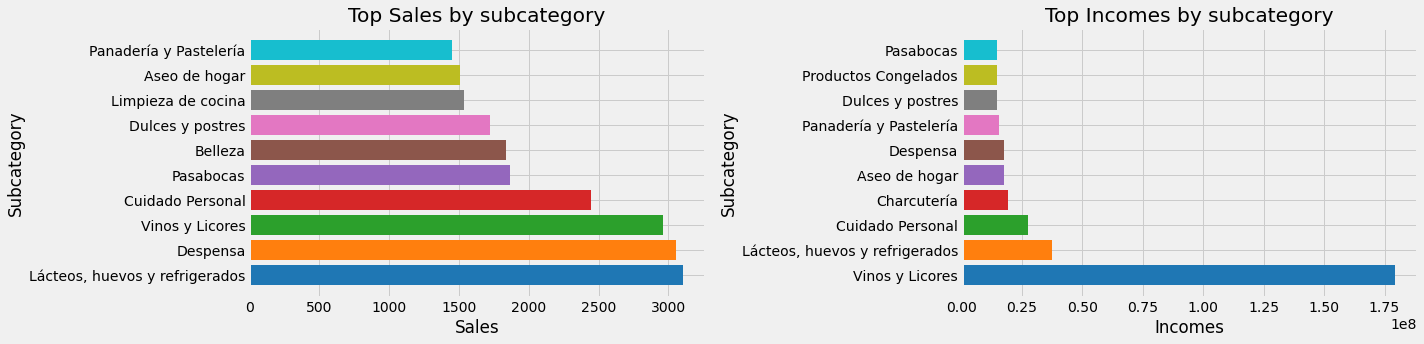

In [17]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(1, 2, figsize=(20,5))
#Sales by subcategory
axes[0].barh(dataq1_count["subcategory"], dataq1_count["category"], color=colors)
axes[0].set_title("Top Sales by subcategory")
axes[0].set_xlabel("Sales")
axes[0].set_ylabel("Subcategory")

#Income by subcategory
axes[1].barh(dataq1_sum["subcategory"], dataq1_sum["prod_unit_price"], color=colors)
axes[1].set_title("Top Incomes by subcategory")
axes[1].set_xlabel("Incomes")
axes[1].set_ylabel("Subcategory")

fig.tight_layout()

# Q2 : Top Sales and Income by Product

In [18]:
#Count Sales
dataq2_count = data_to_explore.groupby(["prod_name"], as_index=False).count().sort_values("category", ascending=0)[:10]

#Sum product prices
dataq2_sum = data_to_explore.groupby(["prod_name"], as_index=False).sum().sort_values("prod_unit_price", ascending=0)[:10]

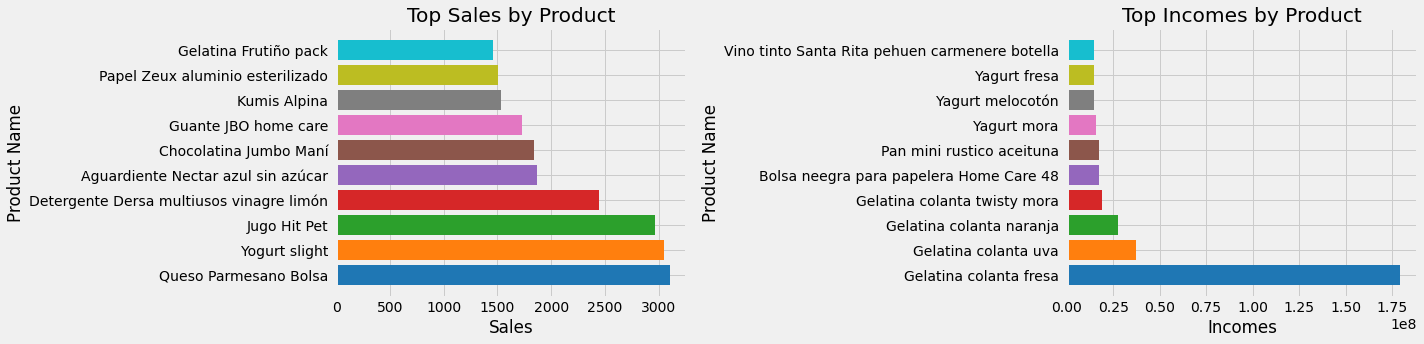

In [19]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(1, 2, figsize=(20,5))
#Sales by product
axes[0].barh(dataq2_count["prod_name"], dataq1_count["category"], color=colors)
axes[0].set_title("Top Sales by Product")
axes[0].set_xlabel("Sales")
axes[0].set_ylabel("Product Name")

#Income by product
axes[1].barh(dataq2_sum["prod_name"], dataq1_sum["prod_unit_price"], color=colors)
axes[1].set_title("Top Incomes by Product")
axes[1].set_xlabel("Incomes")
axes[1].set_ylabel("Product Name")
fig.tight_layout()

## Q3: Sales and Income per month in 2019

In [20]:
data_to_explore.head(5)

,date,prod_name,prod_brand,category,subcategory,prod_unit_price,prod_units,prod_source,year,month,day,MonthName
0,20190609,Limpia tapicería en espuma Binner,BINNER,Supermercado,Aseo de hogar,15590.0,Unidades,VERDE,2019,6,9,June
1,20190609,Limpia tapicería y alfombras Binner,BINNER,Supermercado,Aseo de hogar,13993.0,Unidades,VERDE,2019,6,9,June
2,20190609,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,DR.BECKMANN,Supermercado,Aseo de hogar,16513.0,Unidades,VERDE,2019,6,9,June
3,20190609,Aceite Bon Aire eléctrico perfume flores,BONAIRE,Supermercado,Aseo de hogar,14990.0,Unidades,VERDE,2019,6,9,June
4,20190609,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,BONAIRE,Supermercado,Aseo de hogar,34990.0,Unidades,VERDE,2019,6,9,June


In [21]:
#Filter to 2019
dataq3filter = data_to_explore["year"] == 2019
dataq3 = data_to_explore[dataq3filter]

#Month incomes
dataq3_month_in = dataq3.groupby(["MonthName"], 
                                 as_index=False).sum().sort_values("prod_unit_price", ascending=0)

#Month Sales
dataq3_month_sales = dataq3.groupby(["MonthName"], 
                                    as_index=False).count().sort_values("prod_unit_price", ascending=0)

Text(0, 0.5, 'Sales')

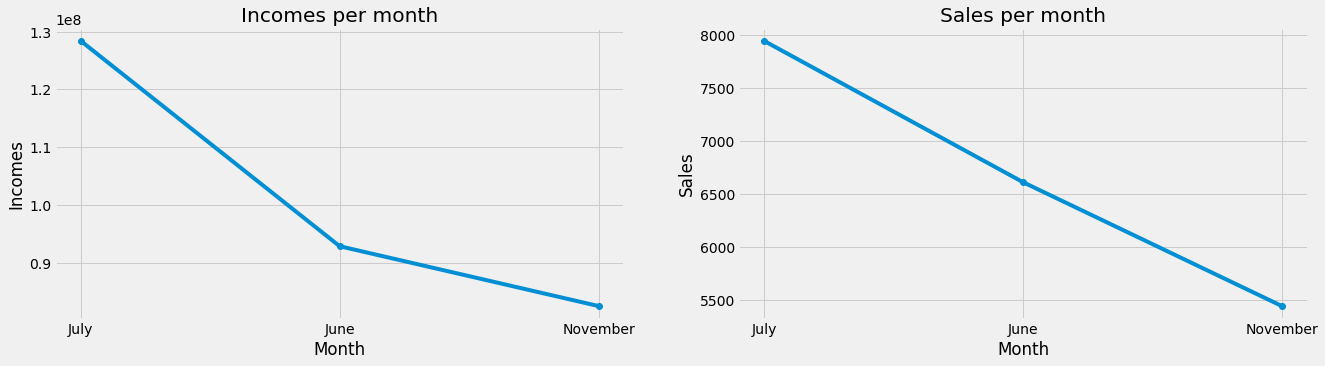

In [27]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(1, 2, figsize=(20,5))
#Month incomes
axes[0].plot(dataq3_month_in["MonthName"], dataq3_month_in["prod_unit_price"], 
             marker="o")
axes[0].set_title("Incomes per month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Incomes")


#Month sales
axes[1].plot(dataq3_month_sales["MonthName"], dataq3_month_sales["prod_unit_price"], 
             marker="o")
axes[1].set_title("Sales per month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Sales")

## Q4: Top brands with the highest revenues and sales.

In [23]:
#Count Sales
dataq4_count = data_to_explore.groupby(["prod_brand"], 
                                       as_index=False).count().sort_values("category", ascending=0)[:10]

#Sum product prices
dataq4_sum = data_to_explore.groupby(["prod_brand"], 
                                     as_index=False).sum().sort_values("prod_unit_price", ascending=0)[:10]

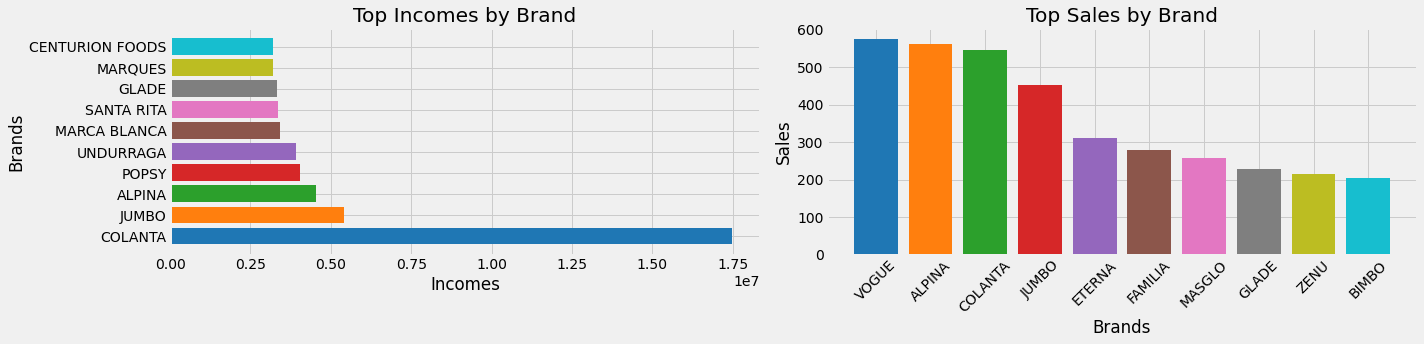

In [33]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(1, 2, figsize=(20,5))
#Brand incomes

axes[0].set_title("Top Incomes by Brand")
axes[0].set_xlabel("Incomes")
axes[0].set_ylabel("Brands")
axes[0].barh(dataq4_sum["prod_brand"], dataq4_sum["prod_unit_price"], 
            color=colors)

#Brand sales

axes[1].set_title("Top Sales by Brand")
axes[1].set_xlabel("Brands")
axes[1].set_ylabel("Sales")
axes[1].set_xticks(np.arange(10))
axes[1].set_xticklabels(dataq4_count["prod_brand"], rotation = 45)
axes[1].bar(dataq4_count["prod_brand"], dataq4_count["prod_unit_price"],
            color=colors)

fig.tight_layout()

The bar chart shows that Colanta is the brand that generates the highest revenues, while Vogue, Alpina, Colanta and Jumbo are in the top 5 with the highest sales.